# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [1]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


## Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called two_sample_p_value

### Hypothesis 1: Proportion of adverse effects differs significantly between Drug and Placebo groups


In [2]:
drug_safety.groupby('trx')['adverse_effects'].value_counts()

# Count the number of adverse effects per group

success_count = np.array([1024, 512])  # Adverse effects count in Drug and Placebo
n = np.array([9703 + 1024, 4864 + 512])  # Total in each group

# Perform a two-proportion Z-test
stat, p_value = proportions_ztest(success_count, n, alternative='two-sided')
two_sample_p_value = p_value

print(two_sample_p_value)

0.9639333330262475


## Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called num_effects_p_value containing a p-value.

### Hypothesis 2: The number of adverse effects is independent of treatment type


<Axes: xlabel='trx'>

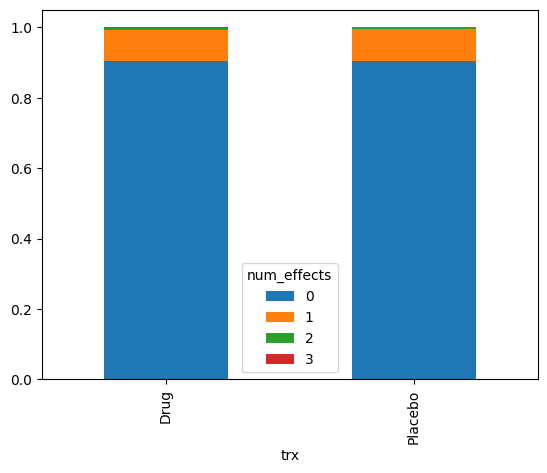

In [3]:
drug_safety.groupby('trx')['num_effects'].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)


In [4]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test

# contingency_table = drug_safety.groupby('trx')['num_effects'].value_counts().unstack()
contingency_table = pd.crosstab(drug_safety["trx"], drug_safety["num_effects"])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(p_val)

num_effects_p_value = p_val

0.6150123339426765


## Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called age_group_effects_p_value.

### Hypothesis 3: Age distribution differs significantly between Drug and Placebo groups


In [5]:
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


<Axes: xlabel='trx', ylabel='age'>

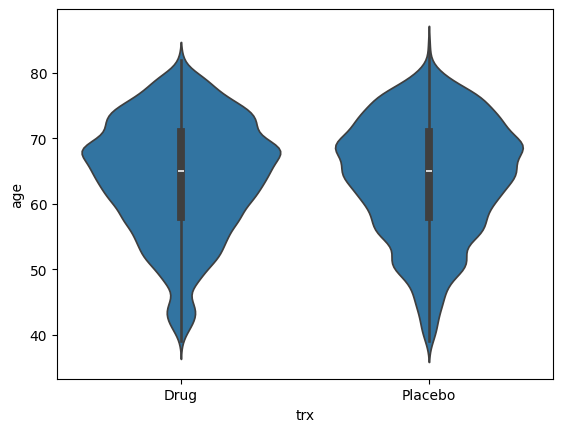

In [6]:
sns.violinplot(x="trx", y="age", data=drug_safety)

### Shapiro-Wilk test for normality


In [7]:
from scipy.stats import shapiro

drug_ages = drug_safety[drug_safety.trx=='Drug'].age
placebo_ages = drug_safety[drug_safety.trx=='Placebo'].age

# Shapiro-Wilk Test
stat, p_value = shapiro(drug_ages)
if p_value > 0.05:
    print("Data is normal")
else:
    print("Data is not normal")


# Shapiro-Wilk Test
stat, p_value = shapiro(placebo_ages)
if p_value > 0.05:
    print("Data is normal")
else:
    print("Data is not normal")


Data is not normal
Data is not normal


c:\Users\El-Wattaneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10727.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\El-Wattaneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5376.
  res = hypotest_fun_out(*samples, **kwds)


# Since data is not normally distributed, perform Mann-Whitney U test


In [8]:

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x= drug_ages,
                        y= placebo_ages,
                        alternative='two-sided')



# Print the test results
print(wmw_test)

age_group_effects_p_value = wmw_test['p-val']

          U-val alternative     p-val      RBC      CLES
MWU  29149339.5   two-sided  0.256963  0.01093  0.505465
